In [2]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf

import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv('./data/auto-mpg.csv')

In [4]:
origins = {1: 'American', 2: 'European', 3: 'Japanese'}
df['origin'] = df.origin.apply(lambda o : origins[o] )

In [5]:
df.origin.value_counts()

American    245
Japanese     79
European     68
Name: origin, dtype: int64

In [6]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,American,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,American,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,American,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,American,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,American,ford torino


### dummify

In [7]:
df = df.merge(pd.get_dummies(df.origin), left_index=True, right_index= True )

In [8]:
print(df['American'].value_counts())
print(df['European'].value_counts())
print(df['Japanese'].value_counts())

1    245
0    147
Name: American, dtype: int64
0    324
1     68
Name: European, dtype: int64
0    313
1     79
Name: Japanese, dtype: int64


In [9]:
M_US0 = 'American ~ mpg + cylinders + displacement + horsepower + weight + acceleration'
res_US0 = smf.logit(M_US0, data = df).fit()

Optimization terminated successfully.
         Current function value: 0.253958
         Iterations 10


In [10]:
M_US1 = 'American ~ cylinders + displacement + weight'
res_US1 = smf.logit(M_US1, data = df).fit()

Optimization terminated successfully.
         Current function value: 0.263467
         Iterations 9


In [11]:
res_US0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               American   No. Observations:                  392
Model:                          Logit   Df Residuals:                      385
Method:                           MLE   Df Model:                            6
Date:                Mon, 28 Oct 2019   Pseudo R-squ.:                  0.6161
Time:                        22:16:08   Log-Likelihood:                -99.551
converged:                       True   LL-Null:                       -259.33
                                        LLR p-value:                 5.240e-66
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        3.0433      3.329      0.914      0.361      -3.482       9.568
mpg             -0.0224      0.040     -0.553      0.580      -0.102       0.057
cylinders       -1.5509      0.455     -3.411      0.001      -2.442      -0.660
displacement     0.1277      0.018      7.067      0.000       0.092       0.163
horsepower      -0.0323      0.023     -1.416      0.157      -0.077       0.012
weight          -0.0042      0.001     -3.620      0.000      -0.006      -0.002
acceleration     0.0669      0.110      0.608      0.543      -0.149       0.283
================================================================================

Possibly complete quasi-separation: A fraction 0.25 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [12]:
res_US1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               American   No. Observations:                  392
Model:                          Logit   Df Residuals:                      388
Method:                           MLE   Df Model:                            3
Date:                Mon, 28 Oct 2019   Pseudo R-squ.:                  0.6018
Time:                        22:16:08   Log-Likelihood:                -103.28
converged:                       True   LL-Null:                       -259.33
                                        LLR p-value:                 2.384e-67
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.8002      1.663      1.684      0.092      -0.460       6.060
cylinders       -1.7264      0.433     -3.991      0.000      -2.574      -0.878
displacement     0.1182      0.016      7.325      0.000       0.087       0.150
weight          -0.0042      0.001     -4.633      0.000      -0.006      -0.002
================================================================================

Possibly complete quasi-separation: A fraction 0.20 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

#### classification probabilities


In [13]:
yhat = res_US1.predict(df)

(array([ 21.,  32.,  27.,  28.,   9.,  19.,  10.,   4.,   7.,   6.,   4.,
          9.,   2.,   4.,   7.,   6.,   7.,   6.,  14., 170.]),
 array([0.01278378, 0.06214459, 0.1115054 , 0.16086621, 0.21022702,
        0.25958783, 0.30894865, 0.35830946, 0.40767027, 0.45703108,
        0.50639189, 0.5557527 , 0.60511351, 0.65447432, 0.70383513,
        0.75319594, 0.80255676, 0.85191757, 0.90127838, 0.95063919,
        1.        ]),
 <a list of 20 Patch objects>)

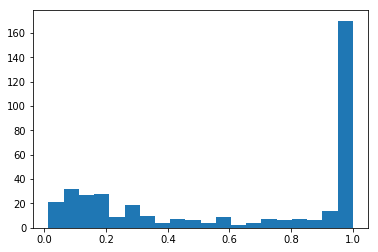

In [14]:
plt.hist(yhat, bins = 20)

In [15]:
print(res_US1.pred_table())
df.American.value_counts()

[[132.  15.]
 [ 30. 215.]]


1    245
0    147
Name: American, dtype: int64

In [16]:
132+215

347

In [17]:
titanic = pd.read_csv("./data/titanic.csv")
titanic[:1]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"


/home/dan/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/dan/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([827., 243., 102.,  52.,  17.,  25.,   4.,   0.,  18.,   3.,  13.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   4.]),
 array([  0.     ,  25.61646,  51.23292,  76.84938, 102.46584, 128.0823 ,
        153.69876, 179.31522, 204.93168, 230.54814, 256.1646 , 281.78106,
        307.39752, 333.01398, 358.63044, 384.2469 , 409.86336, 435.47982,
        461.09628, 486.71274, 512.3292 ]),
 <a list of 20 Patch objects>)

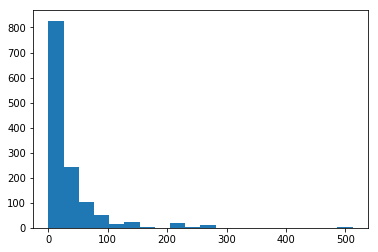

In [19]:
#df.pclass.value_counts()
plt.hist(titanic.fare, bins = 20)

In [20]:
MT = smf.logit('survived~age + pclass + fare + sibsp + parch', data =titanic).fit()

Optimization terminated successfully.
         Current function value: 0.590430
         Iterations 5


In [21]:
MT.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               survived   No. Observations:                 1045
Model:                          Logit   Df Residuals:                     1039
Method:                           MLE   Df Model:                            5
Date:                Mon, 28 Oct 2019   Pseudo R-squ.:                  0.1270
Time:                        22:17:24   Log-Likelihood:                -617.00
converged:                       True   LL-Null:                       -706.79
                                        LLR p-value:                 6.602e-37
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.8370      0.392      7.242      0.000       2.069       3.605
age           -0.0386      0.006     -6.685      0.000      -0.050      -0.027
pclass        -1.0023      0.115     -8.717      0.000      -1.228      -0.777
fare           0.0033      0.002      1.818      0.069      -0.000       0.007
sibsp         -0.2671      0.087     -3.061      0.002      -0.438      -0.096
parch          0.3047      0.089      3.439      0.001       0.131       0.478
==============================================================================
"""

In [22]:
df = titanic
df['fare2'] = df.fare**2
df['fare3'] = df.fare**3
df['fare4'] = df.fare**4

In [23]:
M1 = 'survived ~ fare'
M2 = 'survived ~ fare + fare2'
M3 = 'survived ~ fare + fare2 + fare3'
M4 = 'survived ~ fare + fare2 + fare3 + fare4'

In [31]:
m1 = smf.logit(M1, data = df).fit()
m1.summary()

Optimization terminated successfully.
         Current function value: 0.632275
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               survived   No. Observations:                 1308
Model:                          Logit   Df Residuals:                     1306
Method:                           MLE   Df Model:                            1
Date:                Mon, 28 Oct 2019   Pseudo R-squ.:                 0.04944
Time:                        22:27:09   Log-Likelihood:                -827.02
converged:                       True   LL-Null:                       -870.03
                                        LLR p-value:                 1.773e-20
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.8824      0.076    -11.684      0.000      -1.030      -0.734
fare           0.0125      0.002      7.762      0.000       0.009       0.016
==============================================================================
"""

In [32]:
m2 = smf.logit(M2, data = df).fit()
m2.summary()

Optimization terminated successfully.
         Current function value: 0.627349
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               survived   No. Observations:                 1308
Model:                          Logit   Df Residuals:                     1305
Method:                           MLE   Df Model:                            2
Date:                Mon, 28 Oct 2019   Pseudo R-squ.:                 0.05685
Time:                        22:27:17   Log-Likelihood:                -820.57
converged:                       True   LL-Null:                       -870.03
                                        LLR p-value:                 3.314e-22
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.0186      0.084    -12.070      0.000      -1.184      -0.853
fare           0.0196      0.002      7.896      0.000       0.015       0.024
fare2       -3.16e-05   7.05e-06     -4.485      0.000   -4.54e-05   -1.78e-05
==============================================================================
"""

In [33]:
m3 = smf.logit(M3, data = df).fit()
m3.summary()

Optimization terminated successfully.
         Current function value: 0.617332
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               survived   No. Observations:                 1308
Model:                          Logit   Df Residuals:                     1304
Method:                           MLE   Df Model:                            3
Date:                Mon, 28 Oct 2019   Pseudo R-squ.:                 0.07191
Time:                        22:27:25   Log-Likelihood:                -807.47
converged:                       True   LL-Null:                       -870.03
                                        LLR p-value:                 6.084e-27
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.4229      0.127    -11.216      0.000      -1.672      -1.174
fare           0.0495      0.008      6.293      0.000       0.034       0.065
fare2         -0.0003   9.57e-05     -3.635      0.000      -0.001      -0.000
fare3        7.39e-07   2.79e-07      2.653      0.008    1.93e-07    1.28e-06
==============================================================================
"""

In [34]:
m4 = smf.logit(M4, data = df).fit()
m4.summary()

Optimization terminated successfully.
         Current function value: 0.617324
         Iterations 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               survived   No. Observations:                 1308
Model:                          Logit   Df Residuals:                     1303
Method:                           MLE   Df Model:                            4
Date:                Mon, 28 Oct 2019   Pseudo R-squ.:                 0.07192
Time:                        22:27:30   Log-Likelihood:                -807.46
converged:                       True   LL-Null:                       -870.03
                                        LLR p-value:                 4.257e-26
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.4375      0.164     -8.740      0.000      -1.760      -1.115
fare           0.0512      0.014      3.601      0.000       0.023       0.079
fare2         -0.0004      0.000     -1.340      0.180      -0.001       0.000
fare3       1.007e-06   1.93e-06      0.521      0.602   -2.78e-06     4.8e-06
fare4      -5.638e-10   4.02e-09     -0.140      0.889   -8.45e-09    7.32e-09
==============================================================================
"""

### Confusion matrices actual    / predicted


In [36]:
m1.pred_table()

array([[759.,  49.],
       [393., 107.]])

In [39]:
m2.pred_table()

array([[740.,  68.],
       [374., 126.]])

In [38]:
m3.pred_table()

array([[697., 111.],
       [327., 173.]])

In [37]:
m4.pred_table()

array([[697., 111.],
       [327., 173.]])

In [40]:
M1 = 'survived ~ fare + fare2 + fare3'
M2 = 'survived ~ age + pclass + fare + sibsp + parch'
M3 = 'survived ~ age + pclass + fare + sibsp + parch + C(sex)' 

In [43]:
md1 = smf.logit(M1, data=df).fit()
md2 = smf.logit(M2, data=df).fit()
md3 = smf.logit(M3, data=df).fit()

Optimization terminated successfully.
         Current function value: 0.617332
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.590430
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.464293
         Iterations 6


In [73]:
md1.pred_table()

array([[697., 111.],
       [327., 173.]])

In [76]:
T=697+111+327+173
print(T)
(697+173)/T

1308


0.6651376146788991

In [66]:
sum(md2.pred_table()[1])

427.0

In [49]:
md3.pred_table().shape

(2, 2)

In [69]:
def acc(ar, name='x'):
    return (ar[0][0]+ar[1][1])/  (  sum(ar[0]) + sum(ar[1]) )

In [70]:
acc(md1.pred_table())

0.6651376146788991

In [72]:
acc(md2.pred_table())

0.692822966507177

In [71]:
acc(md3.pred_table())

0.7866028708133971

In [77]:
mc= smf.logit('survived ~ C(pclass)', data = df).fit()

Optimization terminated successfully.
         Current function value: 0.616218
         Iterations 5


In [78]:
mc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               survived   No. Observations:                 1309
Model:                          Logit   Df Residuals:                     1306
Method:                           MLE   Df Model:                            2
Date:                Mon, 28 Oct 2019   Pseudo R-squ.:                 0.07339
Time:                        23:16:55   Log-Likelihood:                -806.63
converged:                       True   LL-Null:                       -870.51
                                        LLR p-value:                 1.803e-28
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.4861      0.115      4.242      0.000       0.262       0.711
C(pclass)[T.2]    -0.7696      0.167     -4.611      0.000      -1.097      -0.442
C(pclass)[T.3]    -1.5567      0.143    -10.860      0.000      -1.838      -1.276
==================================================================================
"""